In [1]:
import os
import re
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
ukuran = (128,128,3)
t_size = (299,299)

base_model = tf.keras.applications.VGG16(input_shape=ukuran,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable=False  
  
#for i, layer in enumerate(base_model.layers):
#  print(i, layer.name)

In [3]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.97):
      print("\nReached aroud 0.95 accuracy so cancelling training!")
      self.model.stop_training = True



In [4]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
preds = tf.keras.layers.Dense(50, activation='softmax') (x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)

base_learning_rate = 0.0001
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])



In [5]:

# Define our example directories and files
train_dir = './batik-group/train'
test_dir = './batik-group/test'
validation_dir = './batik-group/validation'


In [6]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
                                  rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(
                                  rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='categorical',
                                                   target_size=t_size)     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_datagen.flow_from_directory( validation_dir,
                                                   batch_size=20,
                                                   class_mode='categorical',
                                                   target_size=t_size)



Found 150 images belonging to 50 classes.
Found 100 images belonging to 50 classes.


In [7]:
#1
my_epoch = 1
callbacks =  myCallback()

history = model.fit(train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 3,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])
           

Epoch 1/3
100/100 - 217s - loss: 1.3754 - acc: 0.7941 - val_loss: 0.3038 - val_acc: 0.9990
Epoch 2/3

Reached aroud 0.95 accuracy so cancelling training!
100/100 - 221s - loss: 0.1520 - acc: 1.0000 - val_loss: 0.1234 - val_acc: 0.9970


In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
model.save("recognize-batik-weight-mobilenet.h5")

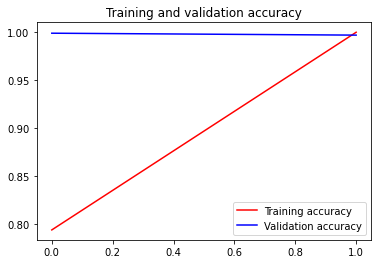

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [10]:
kamus = dict({0: 'm-1', 1: 'm-2',
              2: 'm-3', 3: 'm-4',
              4: 'm-5', 5: 'm-6',
              6: 'm-7', 7: 'm-8',
              8: 'm-9', 9: 'm-10',
              10: 'm-11',11: 'm-12',
              12: 'm-13',13: 'm-14',
              14: 'm-15',15: 'm-16',
              16: 'm-17',17: 'm-18',
              18: 'm-19',19: 'm-20',
              
              20: 'm-21', 21: 'm-22',
              22: 'm-23', 23: 'm-24',
              24: 'm-25', 25: 'm-26',
              26: 'm-27', 27: 'm-28',
              28: 'm-29', 29: 'm-30',
              30: 'm-31', 31: 'm-32',
              32: 'm-33', 33: 'm-34',
              34: 'm-35', 35: 'm-36',
              36: 'm-37', 37: 'm-38',
              38: 'm-39', 39: 'm-40',
               
              40: 'm-41', 41: 'm-42',
              42: 'm-43', 43: 'm-44',
              44: 'm-45', 45: 'm-46',
              46: 'm-47', 47: 'm-48',
              48: 'm-49', 49: 'm-50'})


In [11]:
def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    float regex comes from https://stackoverflow.com/a/12643073/190597
    '''

    return [ atof(c) for c in re.split(r'[+-_]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]

In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(128, 128))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


In [13]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(test_dir):
    for file in f:
        files.append(os.path.join(r, file))

files.sort(key=natural_keys)        


In [14]:
hitung_true=0
hitung_false=0
for a in range (50):
    new_image = load_image(files[a])
    pred = model.predict(new_image)
    hasil_pred = np.argmax(pred)
    print ("True value      : ",kamus[a])
    print ("Predicted Value : ",kamus[hasil_pred])
    
    if a==hasil_pred:
        hitung_true=hitung_true+1
    else:
        hitung_false=hitung_false+1
    print ()
    


True value      :  m-1
Predicted Value :  m-1

True value      :  m-2
Predicted Value :  m-50

True value      :  m-3
Predicted Value :  m-37

True value      :  m-4
Predicted Value :  m-50

True value      :  m-5
Predicted Value :  m-50

True value      :  m-6
Predicted Value :  m-34

True value      :  m-7
Predicted Value :  m-50

True value      :  m-8
Predicted Value :  m-2

True value      :  m-9
Predicted Value :  m-50

True value      :  m-10
Predicted Value :  m-2

True value      :  m-11
Predicted Value :  m-33

True value      :  m-12
Predicted Value :  m-4

True value      :  m-13
Predicted Value :  m-9

True value      :  m-14
Predicted Value :  m-29

True value      :  m-15
Predicted Value :  m-9

True value      :  m-16
Predicted Value :  m-4

True value      :  m-17
Predicted Value :  m-9

True value      :  m-18
Predicted Value :  m-50

True value      :  m-19
Predicted Value :  m-50

True value      :  m-20
Predicted Value :  m-2

True value      :  m-21
Predicted Valu

In [15]:
print("Total True predicted: ",hitung_true)    
print("Total False predicted: ",hitung_false)

Total True predicted:  1
Total False predicted:  49
